# Welcome to SDGnE
---
SDGnE is a Python package designed for Synthetic Data Generation and Evaluation in Rare Event Prediction, offers a comprehensive system for your data needs.



## Notebook

In this notebook, we will use the `Single Encoder Autoencoder` for synthetic data generation. We will generate synthetic data and perform evaluation.

## 0. Loading files
---

You can clone the package from GitHub

In [ ]:
!pip install sdgne

We will use gretel-client to evaluate our results, so let's install it now.

In [ ]:
!pip install gretel-client

> Once cloned and installed, please re-start Google Colab

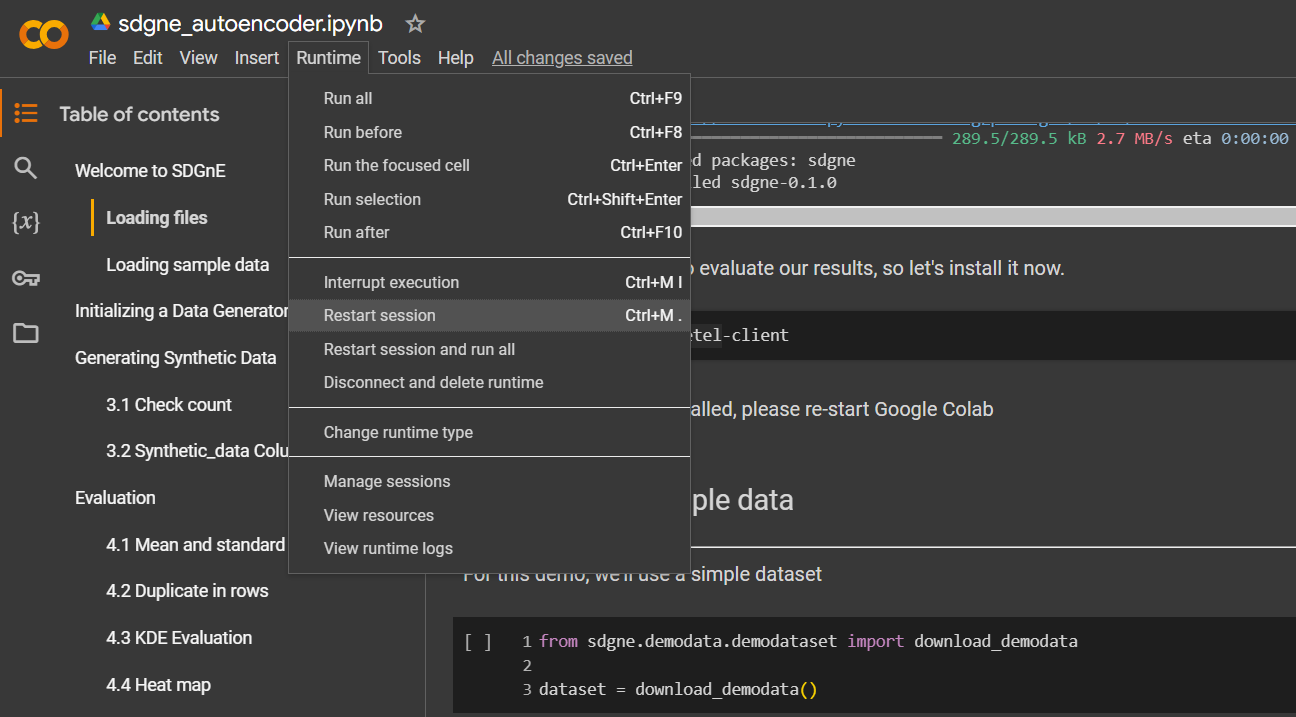

## 1. Loading sample data
---
For this demo, we'll use a simple dataset

In [3]:
from sdgne.demodata.demodataset import download_demodata
import pandas as pd

dataset = download_demodata()



*   The dataset consists of 25 rows and 4062 columns.
*   The `class` label is the output label consisting of values 1 or 0
*   In our dataset class label `0` is in minority.



In [4]:
dataset.head()

,y_am_pef,tempin,humidin,pm25in,co2in,tempdiffin,humidiffin,pm25diffin,pm10,pm25,...,windsd,humid,varp,dewpt,airp,seap,solrhr,solramnt,grdt,class
0,0.284,0.813,0.749,0.291,0.384,0.154,0.396,0.518,0.404,0.173,...,0.226,0.774,0.772,0.906,0.536,0.518,0.311,0.202,0.836,0
1,0.000,0.900,0.820,0.214,0.307,0.169,0.380,0.369,0.436,0.275,...,0.281,0.851,0.832,0.933,0.454,0.437,0.083,0.112,0.815,0
2,0.264,0.807,0.457,0.398,0.184,0.372,0.498,0.447,0.504,0.342,...,0.692,0.430,0.367,0.647,0.646,0.633,0.575,0.235,0.644,1
3,0.475,0.671,0.423,0.397,0.287,0.398,0.649,0.478,0.466,0.306,...,0.190,0.260,0.248,0.544,0.898,0.883,0.746,0.274,0.601,1
4,0.390,0.767,0.557,0.214,0.555,0.287,0.554,0.457,0.397,0.176,...,0.089,0.463,0.428,0.708,0.815,0.796,0.492,0.232,0.710,1


We display the top 5 rows of dataset.

In [5]:
print('Imbalance Count:')
class_counts = dataset['class'].value_counts()
class_counts_table = class_counts.reset_index()
class_counts_table.columns = ['Class', 'Sample_Count']
class_counts_table.style.hide(axis="index")

Imbalance Count:


Class,Sample_Count
1,2925
0,1137


As shown above, class `0` has count of 1137 and is the minority class.

# 2. Initializing a Data Generator
---
In this demo, we would use the `Single Encoder Autoencoder` class from datagenerator.autoencoder to generate synthetic data.

We instantiate the class using `dataset` , `minority_column_label`, `minority_class_label`

*   minority_column_label:
    *   Column label of the class that you want to generate synthetic data for.

*   minority_class_label:
    *   Indicates the class for which minority data should be generated.

> *Note: For all available algorithms, please refer to the documentation.*



In [6]:
from sdgne.datagenerator.autoencoder import SingleEncoderAutoencoder

minority_column_label = 'class'
minority_class_label = 0

synthesizer = SingleEncoderAutoencoder(dataset,
                               minority_column_label,
                               minority_class_label
                               )

# 3. Generating Synthetic Data
---
Now we use the synthesizer object to generate syntehtic data for the minority class and append it to original dataframe.

In [7]:
synthesized_data = synthesizer.data_generator()

## 3.1 Check count

After we generate `synthesized_data`, now lets check the class count.

In [8]:
print('Balanced Count:')
class_counts = synthesized_data['class'].value_counts()
class_counts_table = class_counts.reset_index()
class_counts_table.columns = ['Class', 'Sample_Count']
class_counts_table.style.hide(axis="index")

Balanced Count:


Class,Sample_Count
0,2925
1,2925


## 3.2 Synthetic_data Column

To easily identify the appended synthetic data, we also add a column `synthetic_data` which is `0` for the origininal dataset and `1` for the synthetic dataset.

In [9]:
synthesized_data.columns

Index(['y_am_pef', 'tempin', 'humidin', 'pm25in', 'co2in', 'tempdiffin',
       'humidiffin', 'pm25diffin', 'pm10', 'pm25', 'o3', 'no2', 'co', 'so2',
       'temp', 'windsd', 'humid', 'varp', 'dewpt', 'airp', 'seap', 'solrhr',
       'solramnt', 'grdt', 'class', 'synthetic_data'],
      dtype='object')

# 3.3 Saving Dataset

To use the new dataset, you can simply save it as below.

In [10]:
synthesized_data.to_csv('synthesized_data.csv')

# 4. Evaluation
---
We have added few functions to evaluate the quality of synthetic data and provide a comparative study.

The evaluation functions can be invoked by creating an instance of `Evaluation`

In [11]:
from sdgne.evaluator.evaluator import Evaluation
from tabulate import tabulate

minority_column_label = 'class'
minority_class_label = 0

eval = Evaluation(synthesized_data,
                  minority_column_label,
                  minority_class_label
                  )

## 4.1 Mean and standard deviation

The below function helps us calculate the meand and standard deviation for the real minority and the synthetic minority class.

In [12]:
mean_std_df = eval.mean_and_std()
mean_std_df

,Mean_diff,Mean_original_minority_data,Mean_synthetic_minority_data,Std_original_minority_data,Std_synthetic_minority_data
y_am_pef,0.029839,0.429845,0.400007,0.234906,0.214644
tempin,0.022414,0.508105,0.485690,0.219289,0.201286
solrhr,0.011822,0.463676,0.475498,0.299326,0.285549
pm25diffin,0.009902,0.579442,0.569539,0.184006,0.136713
humid,0.008684,0.467403,0.476087,0.241009,0.231168
humidiffin,0.007706,0.505331,0.497624,0.215609,0.199688
so2,0.007654,0.316427,0.324081,0.228177,0.205333
no2,0.006475,0.337537,0.331062,0.220364,0.204283
seap,0.005892,0.548227,0.542334,0.219533,0.213901
o3,0.005712,0.339090,0.344802,0.202895,0.186252


## 4.2 Duplicate in rows

In [13]:
duplicate_rows_percent = eval.duplicate_in_rows()
duplicate_samples = [
    ["Metric", 'Percent'],
    ["Duplicate Rows Percentage", f"{duplicate_rows_percent:.2f}%"]
]
print(tabulate(duplicate_samples, headers="firstrow"))

Metric                     Percent
-------------------------  ---------
Duplicate Rows Percentage  0.00%


## 4.3 Kullback-Leibler (KL) divergence

 Kullback-Leibler (KL) divergence is a measure of how one probability distribution diverges from a second, expected probability distribution. In simple terms, it quantifies the difference between two probability distributions.

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

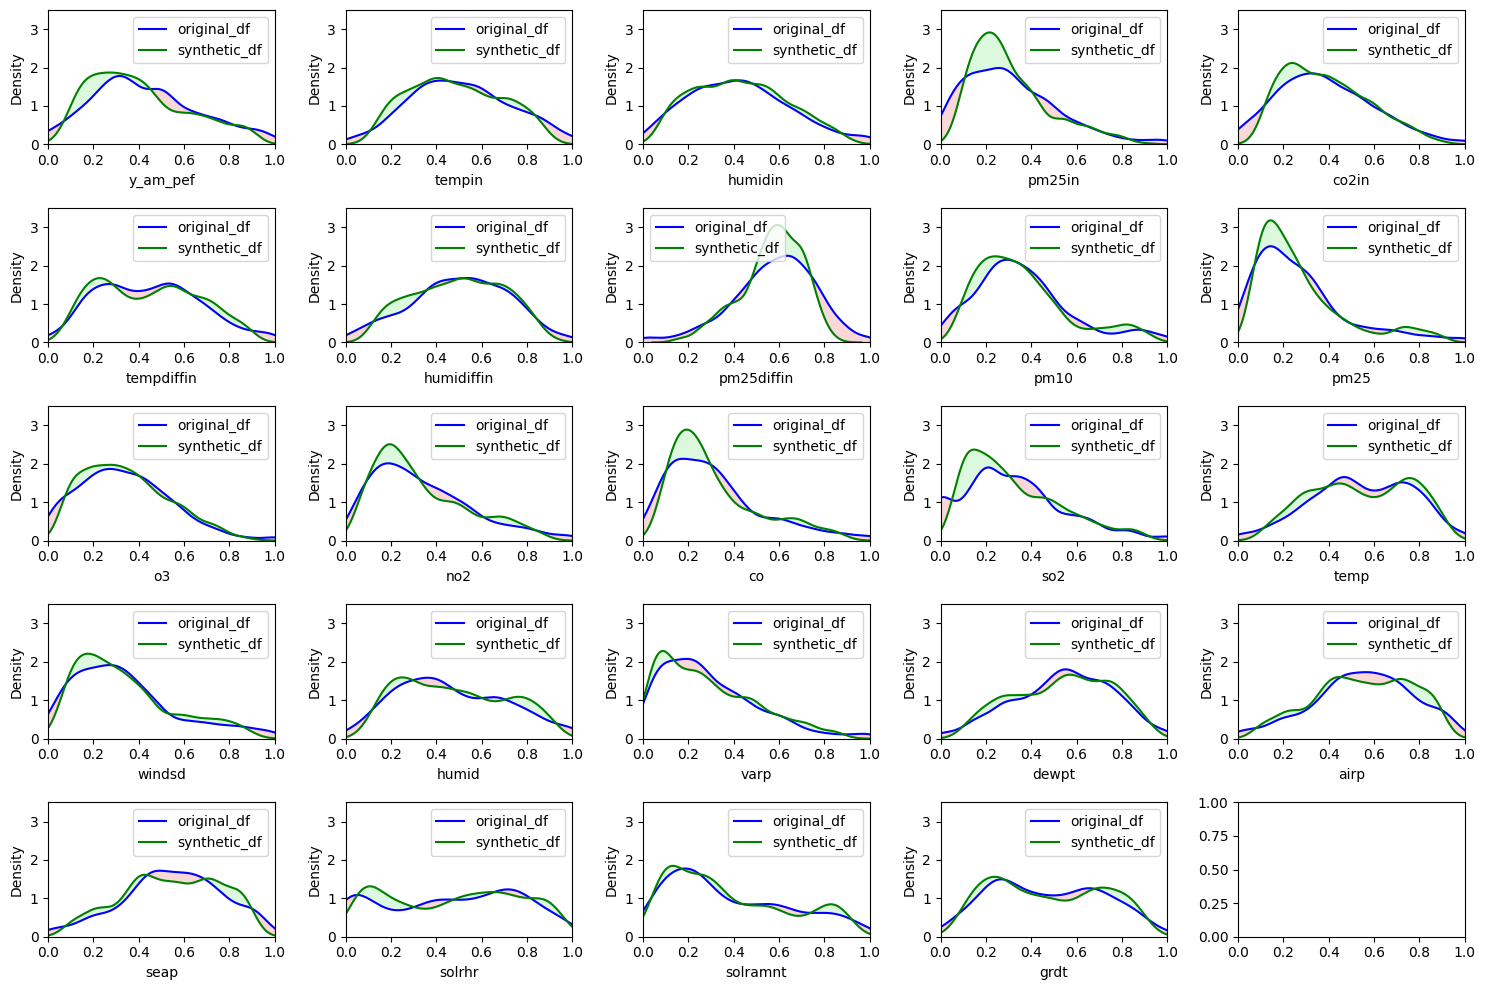

In [14]:
plot, column_details, total_highlighted_area, total_kl_divergence, average_kl_divergence = eval.plot_kde_density_graph()
plot

In [15]:
print(column_details)

        Column  Highlighted area  KL divergence
0     y_am_pef          0.078647       0.038977
1       tempin          0.063148       0.049966
2      humidin          0.036381       0.025547
3       pm25in          0.113835       0.089291
4        co2in          0.056026       0.055862
5   tempdiffin          0.058438       0.026337
6   humidiffin          0.054418       0.041978
7   pm25diffin          0.132970       0.251742
8         pm10          0.073097       0.037147
9         pm25          0.078651       0.036144
10          o3          0.044207       0.026099
11         no2          0.072084       0.035519
12          co          0.088952       0.048272
13         so2          0.070385       0.048191
14        temp          0.064534       0.026330
15      windsd          0.055002       0.030932
16       humid          0.058285       0.023254
17        varp          0.059721       0.030721
18       dewpt          0.049504       0.015913
19        airp          0.075448       0

In [16]:
area_results = {
    'Description': [
        'The total highlighted area',
        'The total kl divergence',
        'The average kl divergence'
    ],
    'Value': [
        total_highlighted_area,
        total_kl_divergence,
        average_kl_divergence
    ]
}

results_table = pd.DataFrame(area_results)
results_table.style.hide(axis="index")

Description,Value
The total highlighted area,1.599610
The total kl divergence,1.039847
The average kl divergence,0.043327


## 4.4 Heat map

The below heat maps shows the co-relation among two columns. To compare original data and synthetic data, we plot a side-by-side heatmap.

As you can see below the co-relation among variables in original and synthetic data is similar.



<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

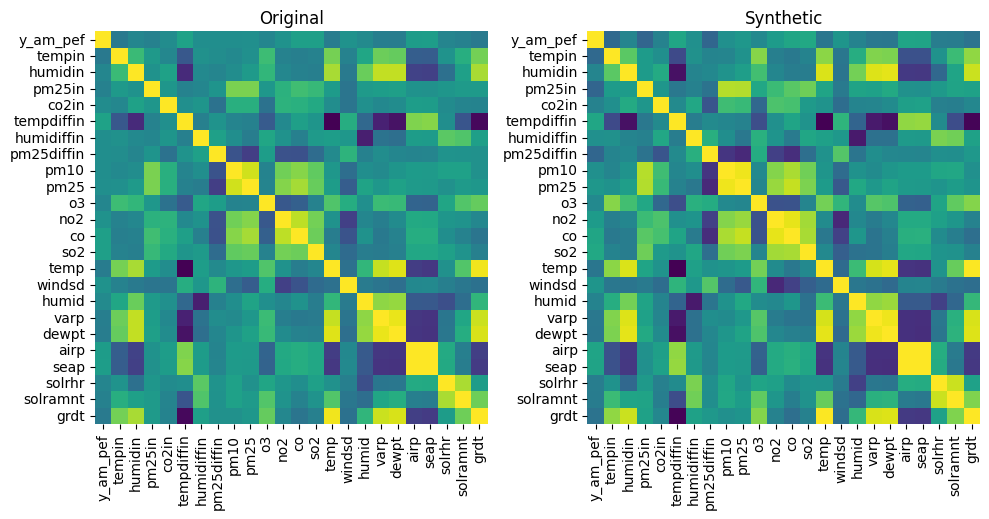

In [17]:
plt = eval.plot_heat_maps()
plt

## 4.5 Gretel Evaluation

Gretel is a online platform to genereate synthetic data using different algorithms. They also provide an easy to use evalaution metrics. We use the gretel score as an additional evaluation metrics.

Please refer to: [gretel.ai](https://gretel.ai/evaluate)



We call `gretel-client` to calculate Gretel Score

In [ ]:
from sdgne.evaluator.evaluator import GretelEvaluation

To calculate `raw_score` and the `grade` of the synthetic dataset, you'd need to get the GRETEL_API_KEY. Which you can get from [here.](https://console.gretel.ai/users/me/key)

In [ ]:
GRETEL_API_KEY = 'GRETEL_API_KEY'
gretel_evaluator = GretelEvaluation(synthesized_data,
                        minority_column_label,
                        minority_class_label,
                        GRETEL_API_KEY)

We run the `run_gretel_quality_report` functionthat returns the Gretel_report

In [ ]:
gretel_score = gretel_evaluator.run_gretel_quality_report()
gretel_score

{'Acknowledgement': 'This is a quality report for the synthetic data generated by Gretel AI. Please refer to https://gretel.ai/ for complete documentation',
 'Gretel_report': {'raw_score': 83.89629629629628,
  'grade': 'Excellent',
  'score': 83}}

# 5. Acknowledgement
---
- Chawla, N.V., Bowyer, K.W., Hall, L.O., Kegelmeyer, W.P.: SMOTE: synthetic minority over-sampling technique. Journal of artificial intelligence research 16, 321–357 (2002)

- Lee, H., Kim, J., Kim, S.: Gaussian-based smote algorithm for solving skewed class distributions. International Journal of Fuzzy Logic and Intelligent Systems 17(4),229–234 (2017)

- Kamalov, F., Denisov, D.: Gamma distribution-based sampling for imbalanced data. Knowledge-Based Systems 207, 106368 (2020)

- Wan, Q., Deng, X., Li, M., Yang, H.: SDDSMOTE: Synthetic minority oversampling technique based on sample density distribution for enhanced classification on imbalanced microarray data. In: The 6th International Conf. on Compute and Data Analysis. pp. 35–42 (2022)

- Bae, W.D., Alfonso, A., Stanko, D., Hao, L., Le, L., Horak, M.: Improving classification performance on rare events in data starved medical applications. In: 2023 IEEE International Symposium on Medical Measurements and Applications (MeMeA). pp. 1–6. IEEE (2023)

- Xu, L., Skoularidou, M., Cuesta-Infante, A., Veeramachaneni, K.: Modeling tabular data using conditional GAN. Advances in neural information processing systems 32 (2019)

- Baldi, Pierre. Autoencoders, unsupervised learning, and deep architectures. Proceedings of ICML workshop on unsupervised and transfer learning. JMLR Workshop and Conference Proceedings (2012)

- Delgado, Juan Manuel Davila, and Lukumon Oyedele. "Deep learning with small datasets: using autoencoders to address limited datasets in construction management." Applied Soft Computing 112 (2021)

- Gretel AI, Gretel Labs, accessed 28 January 2024, https://gretel.ai/.